In [1]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
import random

In [3]:
n = 3
grover_circuit = QuantumCircuit(n)

In [4]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

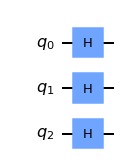

In [5]:
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.draw(output='mpl')

In [6]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "Oracle"

1 0 1 0


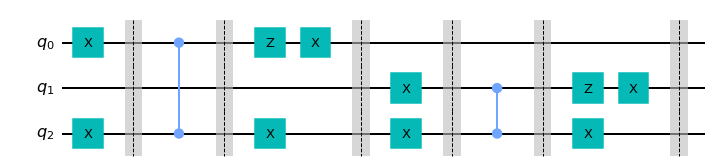

In [7]:
qc = QuantumCircuit(3)

from random import randint

j=randint(0, 1)
k=randint(0, 1)
l=randint(0, 1)
m=randint(0, 1)
print(j,k,l,m)
if j==1:
    qc.x(0)
if k==1:
    qc.z(0)
if l==1:
    qc.x(2)
if m==1:
    qc.z(2)
qc.barrier()
qc.cz(0, 2)
qc.barrier()
if m==1:
    qc.z(2)
if l==1:
    qc.x(2)
if l==1:
    qc.z(0)
if k==1:
    qc.z(0)
if j==1:
    qc.x(0)
qc.barrier()

if j==1:
    qc.x(1)
if k==1:
    qc.z(1)
if l==1:
    qc.x(2)
if m==1:
    qc.z(2)
qc.barrier()
qc.cz(1, 2)
qc.barrier()
if m==1:
    qc.z(2)
if l==1:
    qc.x(2)
if l==1:
    qc.z(1)
if k==1:
    qc.z(1)
if j==1:
    qc.x(1)
qc.barrier()
    
    
qc.draw(output='mpl')

In [8]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

In [13]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(qc, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
#grover_circuit.measure_all()
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')


CircuitError: 'The amount of qubit(3)/clbit(0) arguments does not match the gate expectation (9).'

In [14]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'

In [28]:
qc =QuantumCircuit(9)
qc.h(8)
qc.mcx([0,1,2,3,4,5,6,7],8)
qc.h(8)
qc.draw()


q_0: ───────■───────
            │       
q_1: ───────■───────
            │       
q_2: ───────■───────
            │       
q_3: ───────■───────
            │       
q_4: ───────■───────
            │       
q_5: ───────■───────
            │       
q_6: ───────■───────
            │       
q_7: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_8: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [32]:
qc_trans = transpile(qc)

In [39]:
def H(qc,i,j,k):
    if j==1:
        qc.x(i)
    if k==1:
        qc.z(i)
    qc.h(i)
    if k==1:
        qc.x(i)
    if j==1:
        qc.z(i)

    return qc
   
    

In [41]:
def cnot(qc,c,t,j,k,l,m):
    if j==1:
        qc.x(c)
    if k==1:
        qc.z(c)
    if l==1:
        qc.x(t)
    if m==1:
        qc.z(t)
    qc.barrier()
    qc.cx(c,t)
    qc.barrier()
    if m==1:
        qc.z(t)
    if m==1:
        qc.z(c)
    if k==1:
        qc.z(c)
    if l==1:
        qc.x(t)
    if j==1:
        qc.x(t)
    if j==1:
        qc.x(c)
    

    return qc
    
    

In [42]:
def CZ(qc,c,t,j,k,l,m):
    if j==1:
        qc.x(0)
    if k==1:
        qc.z(0)
    if l==1:
        qc.x(2)
    if m==1:
        qc.z(2)
    qc.barrier()
    qc.cz(0, 2)
    qc.barrier()
    if m==1:
        qc.z(2)
    if l==1:
        qc.x(2)
    if l==1:
        qc.z(0)
    if k==1:
        qc.z(0)
    if j==1:
        qc.x(0)
    qc.barrier()

In [ ]:
def QRNG(n):
    qc=QuantumCircuit(n,n)
    qc.h(0:n)
    qc.measure_all()
    